# Linear Regression Project 2

- Carseats 데이터에 대해 모델링
- 다중 선형회귀 모델 -> 시각화에서 차이가 존재
- 가변수화 필요
- 여러 변수(x) -> Sales(y)

In [1]:
# Libray 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 불러오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/Carseats.csv'
data = pd.read_csv(path)

In [3]:
# 상위 5개 행 확인
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
# 하위 5개 행 확인
data.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [5]:
# 기초통계량 확인
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
# 변수 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


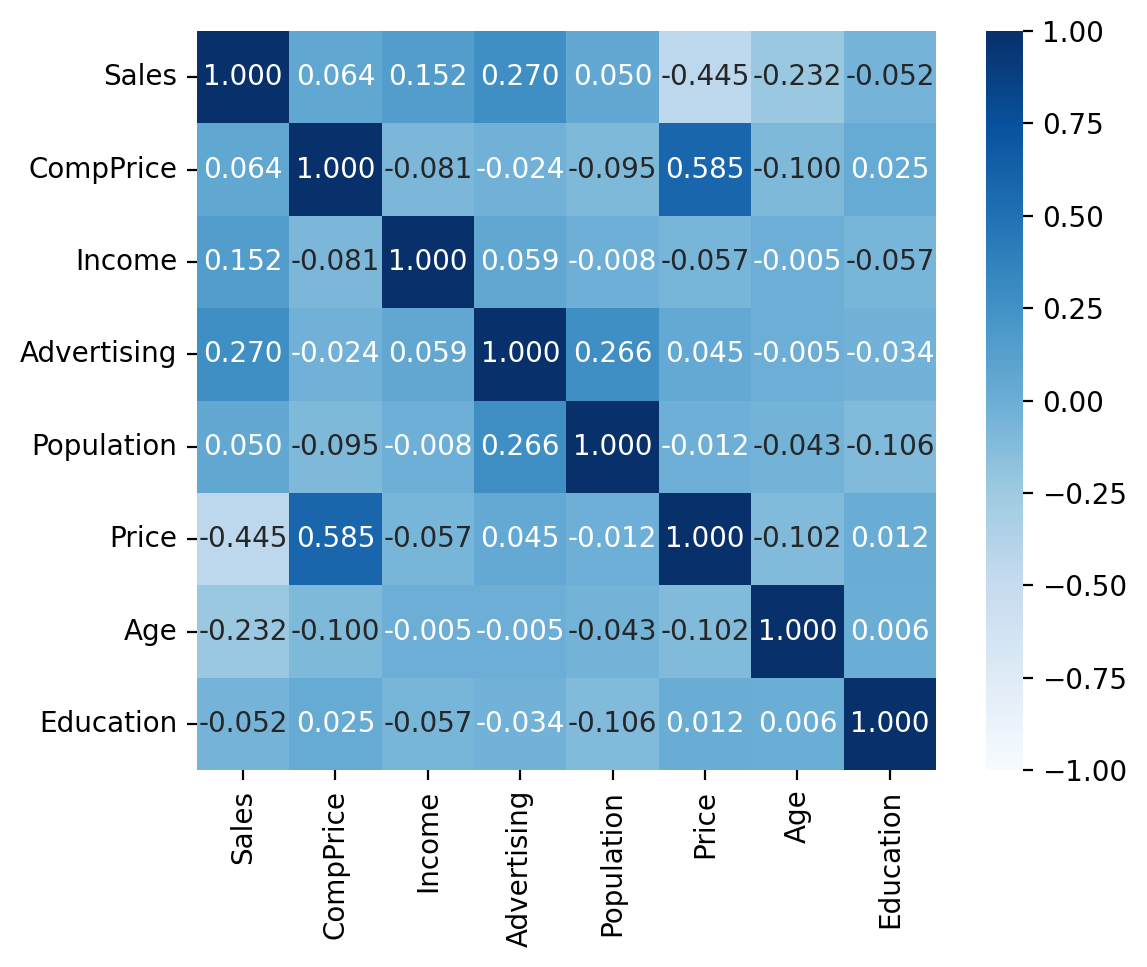

In [8]:
# 상관관계 heatmap으로 확인
sns.heatmap(data.corr(),
            annot=True,
            fmt='.3f',
            vmin=-1, vmax=1,
            square=True,
            cmap='Blues')
plt.show()

In [9]:
# target 설정
target = 'Sales'

# x, y 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

In [10]:
# 가변수화 : ShelvLoc, Education, Urban, US
dumm_cols = ['ShelveLoc', 'Education', 'Urban', 'US']

# 가변수화
x = pd.get_dummies(data=x, columns=dumm_cols, drop_first=True)

# 확인
x.head()

,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc_Good,ShelveLoc_Medium,Education_11,Education_12,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18,Urban_Yes,US_Yes
0,138,73,11,276,120,42,0,0,0,0,0,0,0,0,1,0,1,1
1,111,48,16,260,83,65,1,0,0,0,0,0,0,0,0,0,1,1
2,113,35,10,269,80,59,0,1,0,1,0,0,0,0,0,0,1,1
3,117,100,4,466,97,55,0,1,0,0,0,1,0,0,0,0,1,1
4,141,64,3,340,128,38,0,0,0,0,1,0,0,0,0,0,1,0


In [11]:
# 훈련, 테스트 데이터 분리
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [12]:
# 모델링
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('mae:', mean_absolute_error(y_test, y_pred))
print('r2:', r2_score(y_test, y_pred))

mae: 0.8416098802896118
r2: 0.865781991663677


In [14]:
# 계수 확인
print(list(x))
print(model.coef_)
print(model.intercept_)

['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Education_11', 'Education_12', 'Education_13', 'Education_14', 'Education_15', 'Education_16', 'Education_17', 'Education_18', 'Urban_Yes', 'US_Yes']
[ 9.42233545e-02  1.38354290e-02  1.29531548e-01 -5.23624544e-04
 -9.67176394e-02 -5.14878643e-02  4.85610255e+00  2.02857909e+00
 -2.75940270e-01 -2.24414376e-01 -2.15006864e-01 -1.29912858e-01
  1.22594171e-01 -3.67638446e-01 -3.34511218e-01 -3.84411744e-01
  1.78293080e-01 -2.41139115e-01]
6.097879899078495


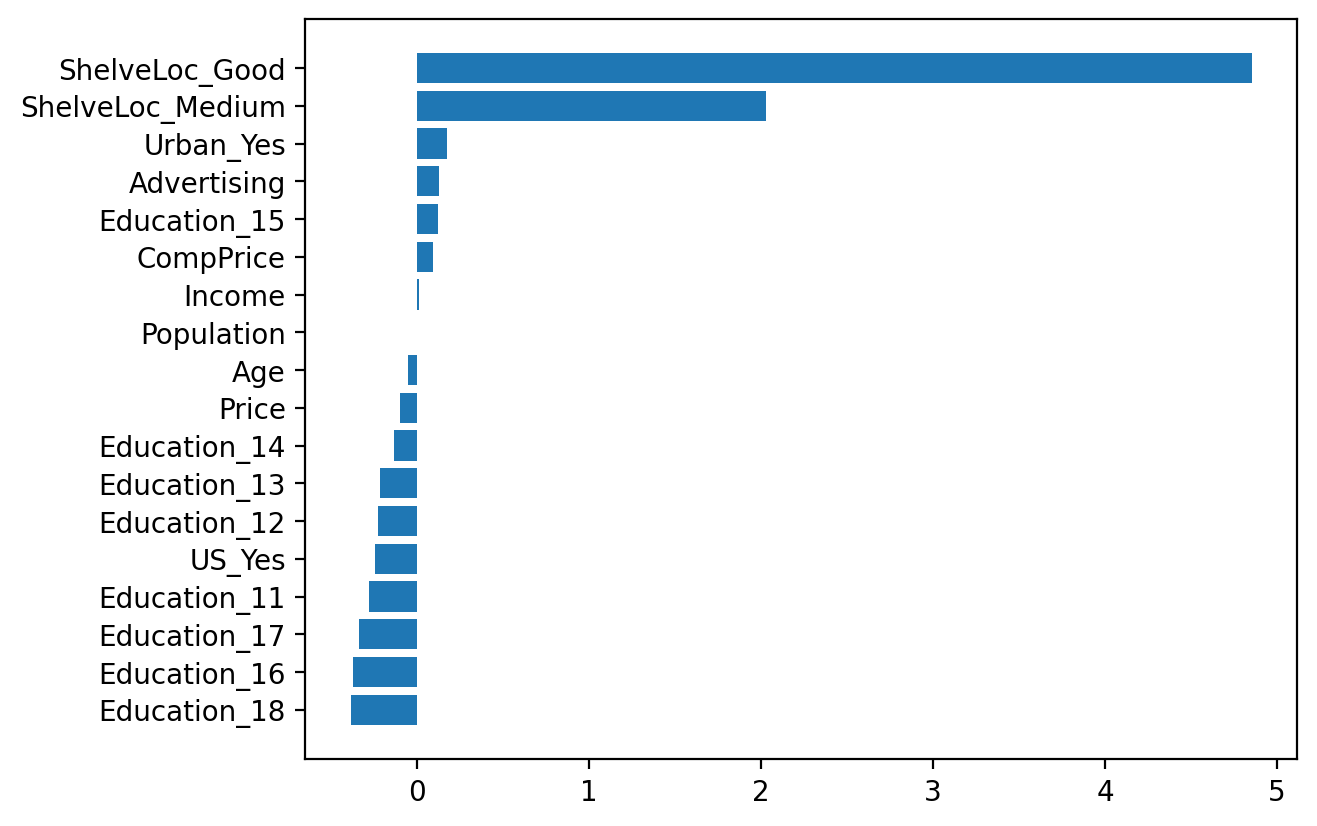

In [15]:
# 가중치 시각화
tmp = pd.DataFrame()
tmp['feature'] = list(x)
tmp['weight'] = model.coef_
tmp.sort_values(by='weight', ascending=True, inplace=True)

# 시각화
plt.barh(tmp['feature'], width=tmp['weight'])
plt.show()

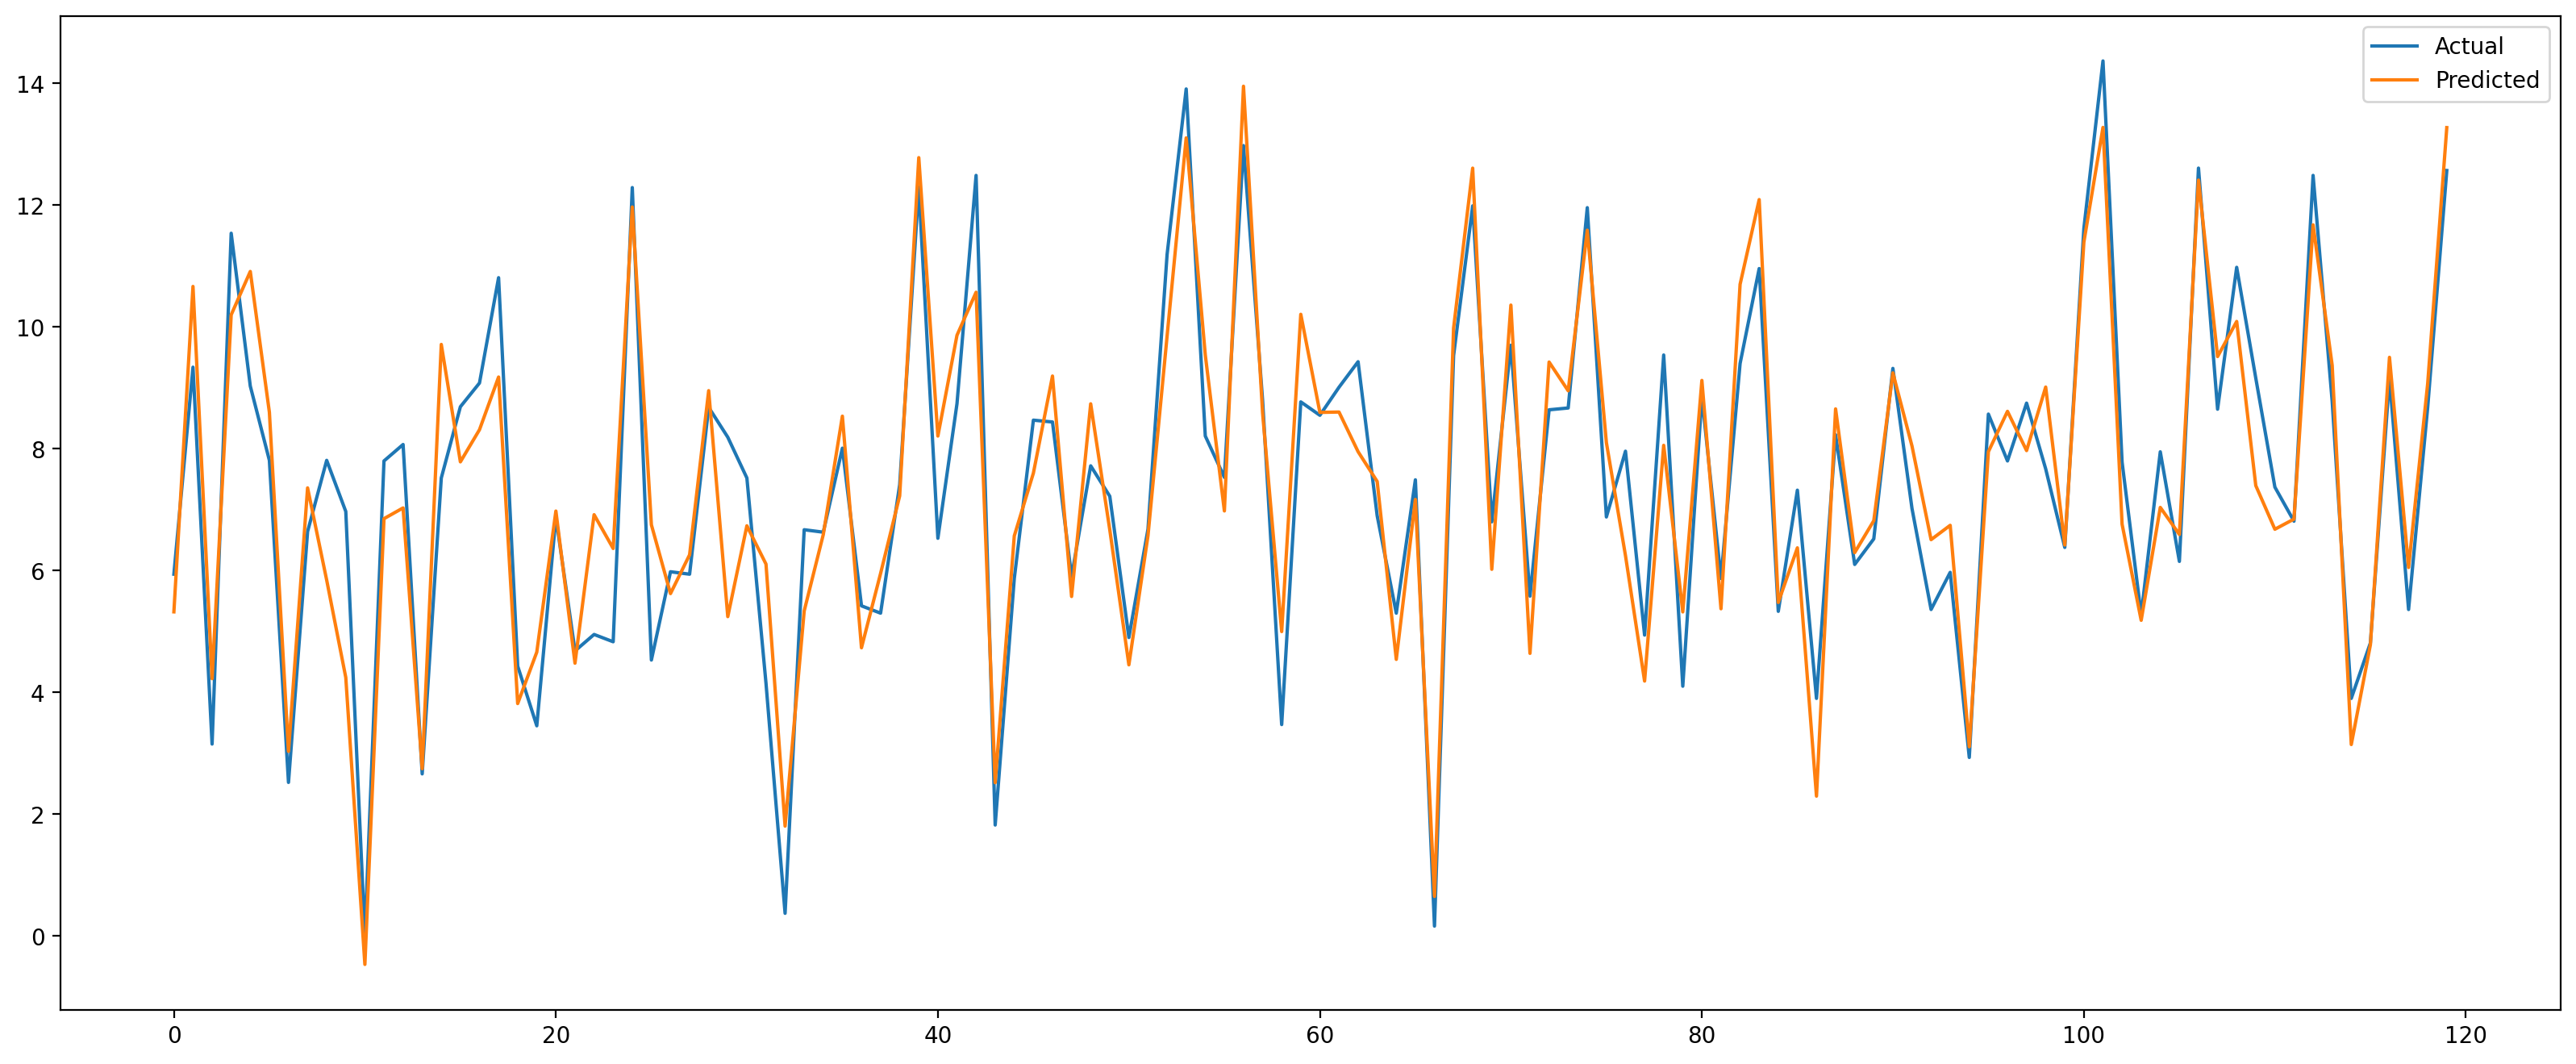

In [16]:
# 예측값, 실제값 시각화
plt.figure(figsize=(20, 8))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()